In [1]:
# Ignore warnings :
import warnings
warnings.filterwarnings('ignore')


# Handle table-like data and matrices :
import numpy as np
import pandas as pd
import math 



# Modelling Algorithms :

# Classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis , QuadraticDiscriminantAnalysis

# Regression
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV, ElasticNet
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor 
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor




# Modelling Helpers :
from sklearn.preprocessing import Imputer , Normalizer , scale
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV , KFold , cross_val_score



#preprocessing :
from sklearn.preprocessing import MinMaxScaler , StandardScaler, Imputer, LabelEncoder



#evaluation metrics :

# Regression
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error 

# Classification
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score  



# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns



# Configure visualisations
%matplotlib inline
mpl.style.use( 'ggplot' )
plt.style.use('fivethirtyeight')
sns.set(context="notebook", palette="dark", style = 'whitegrid' , color_codes=True)
params = { 
    'axes.labelsize': "large",
    'xtick.labelsize': 'x-large',
    'legend.fontsize': 20,
    'figure.dpi': 150,
    'figure.figsize': [25, 7]
}
plt.rcParams.update(params)

In [2]:
df = pd.read_csv("./input/data.csv")

In [3]:
def colorator(x):
    colors = {
        'D': 7,
        'E': 6,
        'F': 5,
        'G': 4,
        'H': 3,
        'I': 2,
        'J': 1,
    }
    return colors[x]

In [4]:
def clarificator(x):
    clarif = {
        'I1': 1,
        'SI2': 2,
        'SI1': 3,
        'VS2': 4,
        'VS1': 5,
        'VVS2': 6,
        'VVS1': 7,
        'IF': 8,
    }
    return clarif[x]

In [5]:
def encodetor(x):
    codes = {
        'Fair': 1,
        'Good': 2,
        'Very Good': 3,
        'Premium': 4,
        'Ideal': 5,
    }
    return codes[x]

In [6]:
df["cut"] = df.cut.apply(encodetor)
df["color"] = df.color.apply(colorator)
df["clarity"] = df.clarity.apply(clarificator)

In [7]:
df.drop('x', axis=1, inplace=True)
df.drop('z', axis=1, inplace=True)

In [8]:
dftrain = df.drop(columns=['price'], axis=1)

In [9]:
y = df['price']
X = dftrain

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=101)

In [11]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [12]:
R2_Scores = []
lmse = []
lmae = []
lrmse = []
accu = []
models = [ 'RandomForest','KNeighbours', 'DecisionTree','GradientBoosting','Linear', 'AdaBoost', 'Ridge']

In [13]:
clf_rf = RandomForestRegressor()
clf_rf.fit(X_train , y_train)
accuracies = cross_val_score(estimator = clf_rf, X = X_train, y = y_train, cv = 5,verbose = 1)
y_pred = clf_rf.predict(X_test)
print('')
print('###### Random Forest ######')
print('Score : %.4f' % clf_rf.score(X_test, y_test))
print(accuracies)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : f ' % r2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



###### Random Forest ######
Score : 0.9783
[0.978786   0.9807438  0.97722491 0.97904804 0.97804658]

MSE    : 351044.97 
MAE    : 298.54 
RMSE   : 592.49 
R2     : f 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.7s finished


In [14]:
no_of_test=[100]
params_dict={'n_estimators':no_of_test,'n_jobs':[-1],'max_features':["auto",'sqrt','log2']}
clf_rf=GridSearchCV(estimator=RandomForestRegressor(),param_grid=params_dict,scoring='r2')
clf_rf.fit(X_train,y_train)
print('Score : %.4f' % clf_rf.score(X_test, y_test))
pred=clf_rf.predict(X_test)
r2 = r2_score(y_test, pred)
print('R2     : %0.2f ' % r2)
R2_Scores.append(r2)
lmse.append(round(mse,2))
lmae.append(round(mae,2))
lrmse.append(round(rmse,2))
accu.append(accuracies)

Score : 0.9799
R2     : 0.98 


In [15]:
clf_knn = KNeighborsRegressor()
clf_knn.fit(X_train , y_train)
accuracies = cross_val_score(estimator = clf_knn, X = X_train, y = y_train, cv = 5,verbose = 1)
y_pred = clf_knn.predict(X_test)
print('')
print('###### KNeighbours Regression ######')
print('Score : %.4f' % clf_knn.score(X_test, y_test))
print(accuracies)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.8s finished



###### KNeighbours Regression ######
Score : 0.9618
[0.95883198 0.9614943  0.96118038 0.96141774 0.95796732]

MSE    : 618851.94 
MAE    : 427.28 
RMSE   : 786.67 
R2     : 0.96 


In [16]:
n_neighbors=[]
for i in range (0,50,5):
    if(i!=0):
        n_neighbors.append(i)
params_dict={'n_neighbors':n_neighbors,'n_jobs':[-1]}
clf_knn=GridSearchCV(estimator=KNeighborsRegressor(),param_grid=params_dict,scoring='r2')
clf_knn.fit(X_train,y_train)
print('Score : %.4f' % clf_knn.score(X_test, y_test))
pred=clf_knn.predict(X_test)
r2 = r2_score(y_test, pred)
print('R2     : %0.2f ' % r2)
R2_Scores.append(r2)
lmse.append(round(mse,2))
lmae.append(round(mae,2))
lrmse.append(round(rmse,2))
accu.append(accuracies)

Score : 0.9632
R2     : 0.96 


In [17]:
clf_dct = DecisionTreeRegressor()
clf_dct.fit(X_train , y_train)
accuracies = cross_val_score(estimator = clf_dct, X = X_train, y = y_train, cv = 5,verbose = 1)
y_pred = clf_dct.predict(X_test)
print('')
print('###### DecisionTree Regressor ######')
print('Score : %.4f' % clf_dct.score(X_test, y_test))
print(accuracies)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)
R2_Scores.append(r2)
lmse.append(round(mse,2))
lmae.append(round(mae,2))
lrmse.append(round(rmse,2))
accu.append(accuracies)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



###### DecisionTree Regressor ######
Score : 0.9626
[0.96450358 0.9644232  0.96426895 0.96427697 0.96439836]

MSE    : 606383.36 
MAE    : 379.27 
RMSE   : 778.71 
R2     : 0.96 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.4s finished


In [18]:
clf_gbr = GradientBoostingRegressor(n_estimators=500, learning_rate=0.3,max_depth=1, random_state=0, loss='ls',verbose = 1)
clf_gbr.fit(X_train , y_train)
accuracies = cross_val_score(estimator = clf_gbr, X = X_train, y = y_train, cv = 5,verbose = 1)
y_pred = clf_gbr.predict(X_test)
print('')
print('###### Gradient Boosting Regression #######')
print('Score : %.4f' % clf_gbr.score(X_test, y_test))
print(accuracies)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)

R2_Scores.append(r2)
lmse.append(round(mse,2))
lmae.append(round(mae,2))
lrmse.append(round(rmse,2))
accu.append(accuracies)

      Iter       Train Loss   Remaining Time 
         1    10992513.4832            1.49s
         2     7607656.7162            1.50s
         3     5803853.8145            1.48s
         4     4619216.9877            1.45s
         5     3812545.3296            1.41s
         6     3242971.8563            1.46s
         7     2861488.3338            1.44s
         8     2615522.7606            1.39s
         9     2399694.7557            1.36s
        10     2284078.6887            1.35s
        20     1695362.0785            1.30s
        30     1425392.8521            1.22s
        40     1297495.8712            1.14s
        50     1228361.8382            1.08s
        60     1187394.8423            1.04s
        70     1159780.4343            0.99s
        80     1141777.7312            0.99s
        90     1129544.1455            0.99s
       100     1121052.7840            0.97s
       200     1088728.7642            0.72s
       300     1074217.4745            0.49s
       40

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


        90     1129538.4955            0.91s
       100     1121798.3868            0.89s
       200     1090372.8146            0.63s
       300     1074654.1271            0.40s
       400     1063288.2497            0.20s
       500     1054602.7007            0.00s
      Iter       Train Loss   Remaining Time 
         1    10938388.6054            1.23s
         2     7591352.3116            1.16s
         3     5799199.0916            1.12s
         4     4641742.5609            1.19s
         5     3810117.9195            1.23s
         6     3254288.9084            1.23s
         7     2846380.9838            1.19s
         8     2601820.6598            1.15s
         9     2392437.4878            1.14s
        10     2281332.7311            1.15s
        20     1683879.5621            1.01s
        30     1414882.0147            0.94s
        40     1287553.3148            0.90s
        50     1218320.5690            0.88s
        60     1177721.1420            0.85s
        7

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.9s finished


In [19]:
clf_lr = LinearRegression()
clf_lr.fit(X_train , y_train)
accuracies = cross_val_score(estimator = clf_lr, X = X_train, y = y_train, cv = 5,verbose = 1)
y_pred = clf_lr.predict(X_test)
print('')
print('####### Linear Regression #######')
print('Score : %.4f' % clf_lr.score(X_test, y_test))
print(accuracies)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)

R2_Scores.append(r2)
lmse.append(round(mse,2))
lmae.append(round(mae,2))
lrmse.append(round(rmse,2))
accu.append(accuracies)


####### Linear Regression #######
Score : 0.9047
[0.90788934 0.90107382 0.90483075 0.91357703 0.89814091]

MSE    : 1543555.33 
MAE    : 844.14 
RMSE   : 1242.40 
R2     : 0.90 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished


In [20]:
clf_ar = AdaBoostRegressor(n_estimators=1000)
clf_ar.fit(X_train , y_train)
accuracies = cross_val_score(estimator = clf_ar, X = X_train, y = y_train, cv = 5,verbose = 1)
y_pred = clf_ar.predict(X_test)
print('')
print('###### AdaBoost Regression ######')
print('Score : %.4f' % clf_ar.score(X_test, y_test))
print(accuracies)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)

R2_Scores.append(r2)
lmse.append(round(mse,2))
lmae.append(round(mae,2))
lrmse.append(round(rmse,2))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



###### AdaBoost Regression ######
Score : 0.9159
[0.82685342 0.91012381 0.90498267 0.91948333 0.83215077]

MSE    : 1362240.45 
MAE    : 926.39 
RMSE   : 1167.15 
R2     : 0.92 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   12.7s finished


In [21]:
clf_rr = Ridge(normalize=True)
clf_rr.fit(X_train , y_train)
accuracies = cross_val_score(estimator = clf_rr, X = X_train, y = y_train, cv = 5,verbose = 1)
y_pred = clf_rr.predict(X_test)
print('')
print('###### Ridge Regression ######')
print('Score : %.4f' % clf_rr.score(X_test, y_test))
print(accuracies)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)**0.5
r2 = r2_score(y_test, y_pred)

print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)

R2_Scores.append(r2)
lmse.append(round(mse,2))
lmae.append(round(mae,2))
lrmse.append(round(rmse,2))


###### Ridge Regression ######
Score : 0.7323
[0.73162062 0.73277193 0.73296619 0.73641735 0.72473452]

MSE    : 4335868.81 
MAE    : 1379.55 
RMSE   : 2082.27 
R2     : 0.73 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


In [22]:
compare_models = pd.DataFrame({'Regression-Algorithms' : models , 'R2-Scores' : R2_Scores, 
                               "RMSE" : lrmse, "MAE":lmae, "MSE":lmse})

compare = compare_models.sort_values(by = 'R2-Scores', ascending=False)
display(compare)

,Regression-Algorithms,R2-Scores,RMSE,MAE,MSE
0,RandomForest,0.979863,592.49,298.54,351044.97
1,KNeighbours,0.963220,786.67,427.28,618851.94
2,DecisionTree,0.962566,778.71,379.27,606383.36
3,GradientBoosting,0.930309,1062.51,691.32,1128917.10
5,AdaBoost,0.915905,1167.15,926.39,1362240.45
4,Linear,0.904712,1242.40,844.14,1543555.33
6,Ridge,0.732334,2082.27,1379.55,4335868.81


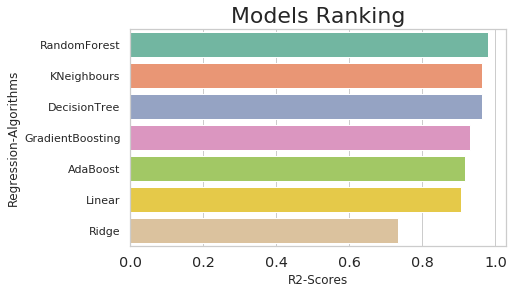

<Figure size 864x720 with 0 Axes>

In [23]:
sns.barplot(x='R2-Scores' , y='Regression-Algorithms' , data=compare, palette='Set2');
plt.title('Models Ranking', size = 22);
plt.figure(figsize=(12,10));

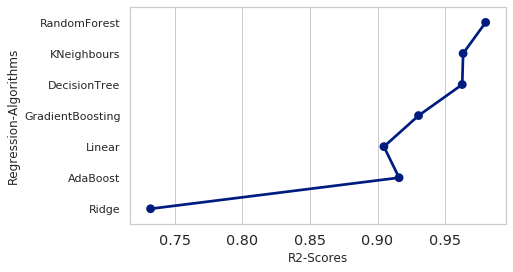

In [24]:

sns.pointplot("R2-Scores","Regression-Algorithms",data=pd.DataFrame({'Regression-Algorithms':models,"R2-Scores":R2_Scores}))

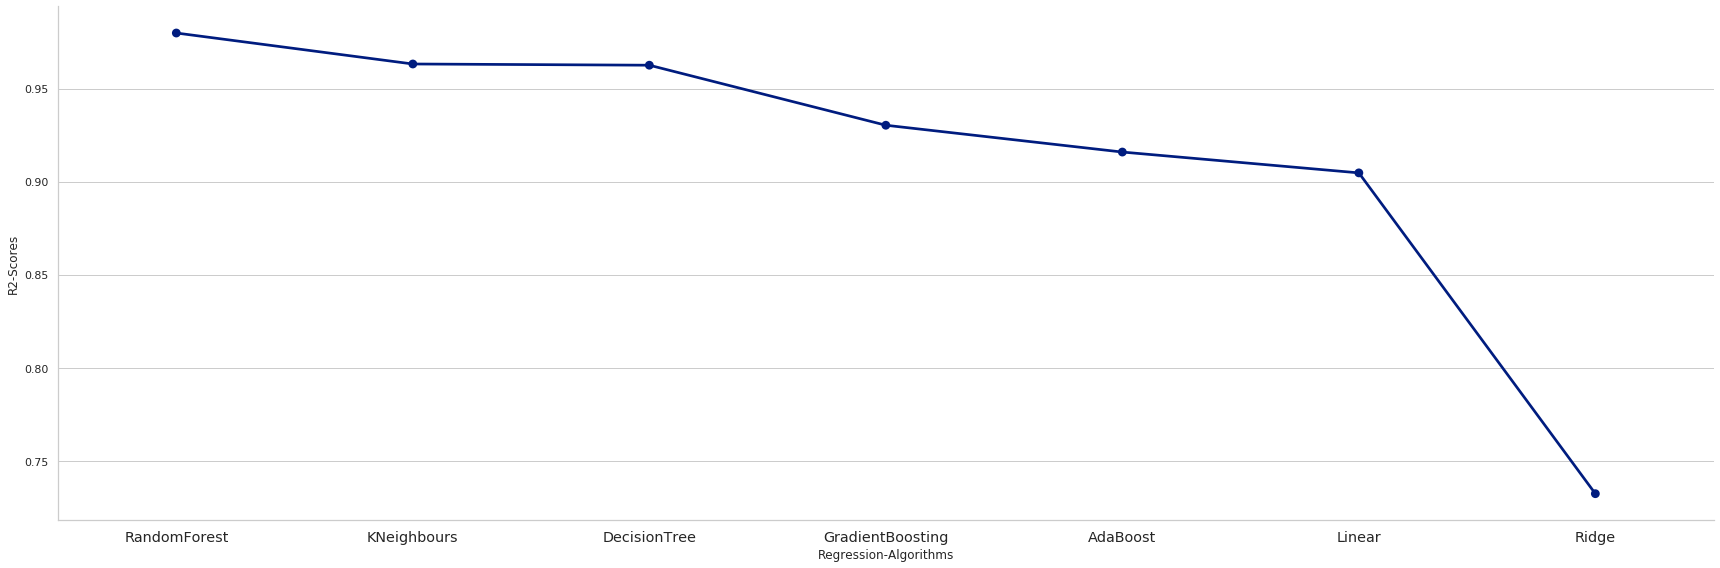

In [25]:
sns.factorplot(x='Regression-Algorithms', y='R2-Scores' , data=compare, size=8 , aspect=3)

In [26]:
parameters = { 
    'bootstrap': [True, False],
    'n_estimators': [100, 500, 750, 1000],
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 8, 10, 12],
    'max_depth' : [10, 50, 75, 100, 150]}